In [1]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate
from keras.layers import Lambda 

import tensorflow as tf



from keras import backend as K



Using TensorFlow backend.


In [2]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub

In [3]:
images = []
for root, dirnames, filenames in os.walk("Dataset/Train_images/"):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        image = ndimage.imread(filepath, mode="L")
        images.append(image)

In [6]:
print (images[0].shape)


(496, 64)


In [7]:
labels = np.load('train_labels.npy')
labels_list = []
for i in range(len(labels)):
    labels_list.append(labels[i])

In [18]:
print (len(labels_list))
print (type(labels_list[0]))

images=np.array(images)
print(images.shape[0])
images = images.reshape(images.shape[0],496,64,1)

print(images[0].shape)
train_indices = np.random.choice(770,500,replace = False)
print(sorted(train_indices))
train_images = []
train_labels = [] 
for i in train_indices:
    train_images.append(images[i])
    train_labels.append(labels_list[i])

test_indices = [x for x in range(700) if x not in train_indices]
print(test_indices)
test_images = []
test_labels = []
for i in test_labels:
    test_images.append(images[i])
    test_labels.append(labels_list[i])

770
<type 'numpy.ndarray'>
770
(496, 64, 1)
[1, 2, 3, 5, 7, 8, 10, 13, 15, 16, 17, 19, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41, 43, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56, 58, 63, 64, 66, 68, 69, 70, 71, 73, 75, 77, 78, 79, 81, 85, 87, 90, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 110, 111, 113, 114, 117, 118, 120, 122, 125, 126, 127, 128, 131, 132, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 152, 153, 156, 157, 159, 161, 163, 165, 168, 169, 170, 171, 173, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 190, 193, 195, 196, 197, 198, 199, 200, 203, 204, 206, 207, 208, 210, 212, 213, 214, 215, 216, 218, 219, 222, 223, 224, 225, 227, 228, 231, 233, 234, 236, 237, 238, 240, 241, 242, 243, 244, 247, 248, 249, 250, 252, 254, 257, 258, 260, 261, 263, 264, 266, 267, 268, 270, 271, 272, 273, 276, 277, 279, 280, 282, 285, 287, 288, 289, 290, 292, 293, 294, 297, 298, 299, 300, 301, 302, 303, 305, 306, 310, 311, 314, 315, 316,

In [19]:
print (len(train_images))
print (len(train_labels))
print (np.array(train_labels).shape)

500
500
(500, 496, 64, 8)


In [10]:
arg_1 = tf.placeholder(tf.float32,shape=(None,248,32,64))
index_mask_1 = tf.placeholder(tf.bool,shape=(None,496,64,64))

arg_2 = tf.placeholder(tf.float32,shape=(None,124,16,64))
index_mask_2 = tf.placeholder(tf.bool,shape=(None,248,32,64))

arg_3 = tf.placeholder(tf.float32,shape=(None,62,8,64))
index_mask_3 = tf.placeholder(tf.bool,shape=(None,124,16,64))

In [11]:
def maxpool_1(x):
    print(type(x))
    print(x.shape)
    y = x[0,:,:,:]
    t = K.argmax(y)
    print(type(t))
    print(t.shape)
    print(type(y))
    print(y.shape)
    outputs = tf.nn.max_pool_with_argmax(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='VALID')
    arg_1=tf.cast(outputs[1],tf.float32)
    upsampled_output=UpSampling2D(size=(2,2))(outputs[0])
    print(upsampled_output.dtype)
    print(arg_1.dtype)
    index_mask_1=K.tf.equal(x,upsampled_output)
    print((arg_1.shape))
    return outputs[0]

def maxpool_2(x):
    print(type(x))
    print(x.shape)
    y = x[0,:,:,:]
    t = K.argmax(y)
    print(type(t))
    print(t.shape)
    print(type(y))
    print(y.shape)
    outputs = tf.nn.max_pool_with_argmax(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='VALID')
    arg_2=tf.cast(outputs[1],tf.float32)
    upsampled_output=UpSampling2D(size=(2,2))(outputs[0])
    print(upsampled_output.dtype)
    print(arg_2.dtype)
    index_mask_2=K.tf.equal(x,upsampled_output)
    print((arg_2.shape))
    return outputs[0]

def maxpool_3(x):
    print(type(x))
    print(x.shape)
    y = x[0,:,:,:]
    t = K.argmax(y)
    print(type(t))
    print(t.shape)
    print(type(y))
    print(y.shape)
    outputs = tf.nn.max_pool_with_argmax(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='VALID')
    arg_3=tf.cast(outputs[1],tf.float32)
    upsampled_output=UpSampling2D(size=(2,2))(outputs[0])
    print(upsampled_output.dtype)
    print(arg_3.dtype)
    index_mask_3=K.tf.equal(x,upsampled_output)
    print((arg_3.shape))
    return outputs[0]

def shape(x):
    shape = list(x)
    shape[1]= shape[1]//2
    shape[2]= None
    return tuple(shape)

In [12]:
print((arg_1.shape))

(?, 248, 32, 64)


In [13]:
def unpool_1(input):
    mask_shape = index_mask_1.get_shape().as_list()
    input_shape = input.get_shape().as_list()
    pool_size = (mask_shape[1] / input_shape[1], None)
    on_success = UpSampling2D(size=(2,2))(input)
    on_fail = K.zeros_like(on_success)
    print()
    return K.tf.where(index_mask_1, on_success, on_fail)

def unpool_2(input):
    mask_shape= index_mask_2.get_shape().as_list()
    input_shape = input.get_shape().as_list()
    pool_size = (mask_shape[1] / input_shape[1], None)
    on_success = UpSampling2D(size=(2,2))(input)
    on_fail = K.zeros_like(on_success)
    print()
    return K.tf.where(index_mask_2, on_success, on_fail)

def unpool_3(input):
    mask_shape = index_mask_3.get_shape().as_list()
    input_shape = input.get_shape().as_list()
    pool_size = (mask_shape[1] / input_shape[1], None)
    on_success = UpSampling2D(size=(2,2))(input)
    on_fail = K.zeros_like(on_success)
    print()
    return K.tf.where(index_mask_3, on_success, on_fail)

In [14]:
def unpool_shape(x):
    shape = list(x)
    shape[1]= shape[1]*2
    shape[2]= None
    return tuple(shape)

In [15]:
# Defines the input tensor
inputs = Input(shape=(496,None,1))

L1 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(inputs)
L2 = BatchNormalization()(L1)
L3 = Lambda(maxpool_1,output_shape = shape)(L2)
#L3 = MaxPooling2D(pool_size=(2,2))(L2)
L4 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L3)
L5 = BatchNormalization()(L4)
L6 = Lambda(maxpool_2,output_shape = shape)(L5)
#L6 = MaxPooling2D(pool_size=(2,2))(L5)
L7 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L6)
L8 = BatchNormalization()(L7)
L9 = Lambda(maxpool_3,output_shape = shape)(L8)
#L9 = MaxPooling2D(pool_size=(2,2))(L8)
L10 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L9)
L11 = BatchNormalization()(L10)
#L12 = UpSampling2D(size = (2,2))(L11)
L12 = Lambda(unpool_3,output_shape = unpool_shape)(L11)
L13 = Concatenate(axis = 3)([L8,L12])
L14 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L13)
L15 = BatchNormalization()(L14)
#L16 = UpSampling2D(size= (2,2))(L15)
L16 = Lambda(unpool_2,output_shape=unpool_shape)(L15)
L17 = Concatenate(axis = 3)([L16,L5])
L18 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L17)
L19 = BatchNormalization()(L18)
L20 = Lambda(unpool_1,output_shape=unpool_shape)(L19)
#L20 = UpSampling2D(size=(2,2),name = "Layer19")(L19)
L21 = Concatenate(axis=3)([L20,L2])
L22 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L21)
L23 = BatchNormalization()(L22)
L24 = Conv2D(8,kernel_size=(1,1),activation = 'softmax',padding = "same")(L23)

model = Model(inputs = inputs, outputs = L24)
model.summary()

<class 'tensorflow.python.framework.ops.Tensor'>
(?, 496, ?, 64)
<class 'tensorflow.python.framework.ops.Tensor'>
(496, ?)
<class 'tensorflow.python.framework.ops.Tensor'>
(496, ?, 64)
<dtype: 'float32'>
<dtype: 'float32'>
(?, 248, ?, 64)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 248, ?, 64)
<class 'tensorflow.python.framework.ops.Tensor'>
(248, ?)
<class 'tensorflow.python.framework.ops.Tensor'>
(248, ?, 64)
<dtype: 'float32'>
<dtype: 'float32'>
(?, 124, ?, 64)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 124, ?, 64)
<class 'tensorflow.python.framework.ops.Tensor'>
(124, ?)
<class 'tensorflow.python.framework.ops.Tensor'>
(124, ?, 64)
<dtype: 'float32'>
<dtype: 'float32'>
(?, 62, ?, 64)
()
()
()
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 496, None, 1)  0                 

In [21]:
smooth = 1

In [22]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


In [23]:
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [16]:
model.compile(optimizer='Adam',loss=dice_coef_loss,metrics=['accuracy',dice_coef])

In [20]:
train_images_2=np.array(train_images)
train_labels_2=np.array(train_labels)
model.fit(train_images_2,train_labels_2,batch_size=7,epochs=10,validation_split = 0.33)

Train on 334 samples, validate on 166 samples
Epoch 1/10


InvalidArgumentError: No OpKernel was registered to support Op 'MaxPoolWithArgmax' with these attrs.  Registered devices: [CPU], Registered kernels:
  device='GPU'; Targmax in [DT_INT64]; T in [DT_DOUBLE]
  device='GPU'; Targmax in [DT_INT64]; T in [DT_FLOAT]
  device='GPU'; Targmax in [DT_INT64]; T in [DT_HALF]

	 [[Node: lambda_1/MaxPoolWithArgmax = MaxPoolWithArgmax[T=DT_FLOAT, Targmax=DT_INT64, ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](batch_normalization_1/cond/Merge)]]

Caused by op u'lambda_1/MaxPoolWithArgmax', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/lib/python2.7/dist-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/usr/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-130cdad77027>", line 6, in <module>
    L3 = Lambda(maxpool_1,output_shape = shape)(L2)
  File "/usr/local/lib/python2.7/dist-packages/keras/engine/topology.py", line 602, in __call__
    output = self.call(inputs, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/keras/layers/core.py", line 650, in call
    return self.function(inputs, **arguments)
  File "<ipython-input-11-307d7ed59c71>", line 11, in maxpool_1
    strides=[1, 2, 2, 1], padding='VALID')
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_nn_ops.py", line 1898, in max_pool_with_argmax
    Targmax=Targmax, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'MaxPoolWithArgmax' with these attrs.  Registered devices: [CPU], Registered kernels:
  device='GPU'; Targmax in [DT_INT64]; T in [DT_DOUBLE]
  device='GPU'; Targmax in [DT_INT64]; T in [DT_FLOAT]
  device='GPU'; Targmax in [DT_INT64]; T in [DT_HALF]

	 [[Node: lambda_1/MaxPoolWithArgmax = MaxPoolWithArgmax[T=DT_FLOAT, Targmax=DT_INT64, ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](batch_normalization_1/cond/Merge)]]


In [11]:
model.save_weights("weights.h5")

In [55]:
testing_image = ndimage.imread('Dataset/testing_image_4.png',mode = 'L')

In [56]:
testing_image = np.array(testing_image)
print(testing_image.shape[0])

496


In [57]:
testing_image = testing_image.reshape(1,496,64,1)

In [58]:
prediction = model.predict(testing_image)

In [59]:
print(prediction.shape)

(1, 496, 64, 8)


In [60]:
prediction = np.squeeze(prediction,axis = 0)

In [61]:
print(prediction.shape)


(496, 64, 8)


In [62]:
print (prediction)

[[[  9.90431845e-01   5.23849914e-04   2.38480396e-03 ...,   3.14290333e-03
     7.15359987e-04   9.47752633e-05]
  [  9.95876908e-01   1.26564744e-04   5.17529435e-04 ...,   2.05338211e-03
     3.22114036e-04   4.62890821e-05]
  [  9.91709769e-01   3.47106252e-04   1.40436867e-03 ...,   3.52300471e-03
     4.66498459e-04   1.45449289e-04]
  ..., 
  [  9.93215978e-01   2.89540971e-04   1.14223047e-03 ...,   2.86238850e-03
     4.15960822e-04   1.21896235e-04]
  [  9.94165242e-01   1.88748279e-04   9.98849748e-04 ...,   2.88870698e-03
     5.12290921e-04   5.69161930e-05]
  [  9.77184176e-01   1.62097695e-03   5.97098330e-03 ...,   8.09637923e-03
     1.31334132e-03   5.07012708e-04]]

 [[  9.90255058e-01   3.38861166e-04   1.74046448e-03 ...,   4.34618024e-03
     1.35297398e-03   1.18468612e-04]
  [  9.95023370e-01   1.01163852e-04   3.01213498e-04 ...,   2.36597634e-03
     9.77306976e-04   7.58161477e-05]
  [  9.88762558e-01   4.33083362e-04   1.21312588e-03 ...,   5.10587031e-03
  

In [63]:
print(prediction[260][45])

[ 0.18668322  0.02075981  0.07049716  0.08813264  0.0905104   0.37279558
  0.11087015  0.059751  ]


In [64]:
s = [1,2,3,4]
print(np.argmax(s))

3


In [65]:
print(prediction.shape)

(496, 64, 8)


In [66]:
output = np.zeros((496,64))

In [67]:
for i in range(496):
    for j in range(64):
        index = np.argmax(prediction[i][j])
        output[i][j] = index

In [68]:
print (output.shape)

(496, 64)


In [69]:
color= np.zeros((496,64,3))

In [70]:
for j in range(496):
    for k in range(64):
        if(output[j][k]==0):
            color[j][k] = [0,0,0]
        if(output[j][k]==1):
            color[j][k] = [128,0,0]
        if(output[j][k]==2):
            color[j][k] = [0,128,0]
        if(output[j][k]==3):
            color[j][k] = [128,128,0] 
        if(output[j][k]==4):
            color[j][k] = [0,128,128]
        if(output[j][k]==5):
            color[j][k] = [64,0,0]
        if(output[j][k]==6):
            color[j][k] = [192,0,0]
        if(output[j][k]==7):
            color[j][k] = [64,128,0]

In [71]:
plt.imshow(color)

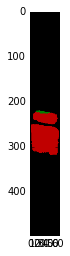

In [72]:
plt.show()